In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py


In [21]:
plt.rcParams['font.size'] = 40
plt.rcParams['xtick.labelsize'] = 40
plt.rcParams['ytick.labelsize'] = 40
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams['xtick.major.pad']='8'


In [3]:
data = np.load("fig1_data_plus_minus_A_20211129.npy")


In [4]:
p = np.delete(data[0],5206)
n = np.delete(data[1],5206)
A = np.delete(data[2],5206)


In [5]:
x= np.arange(0,10*len(p),10)
y= x/3600

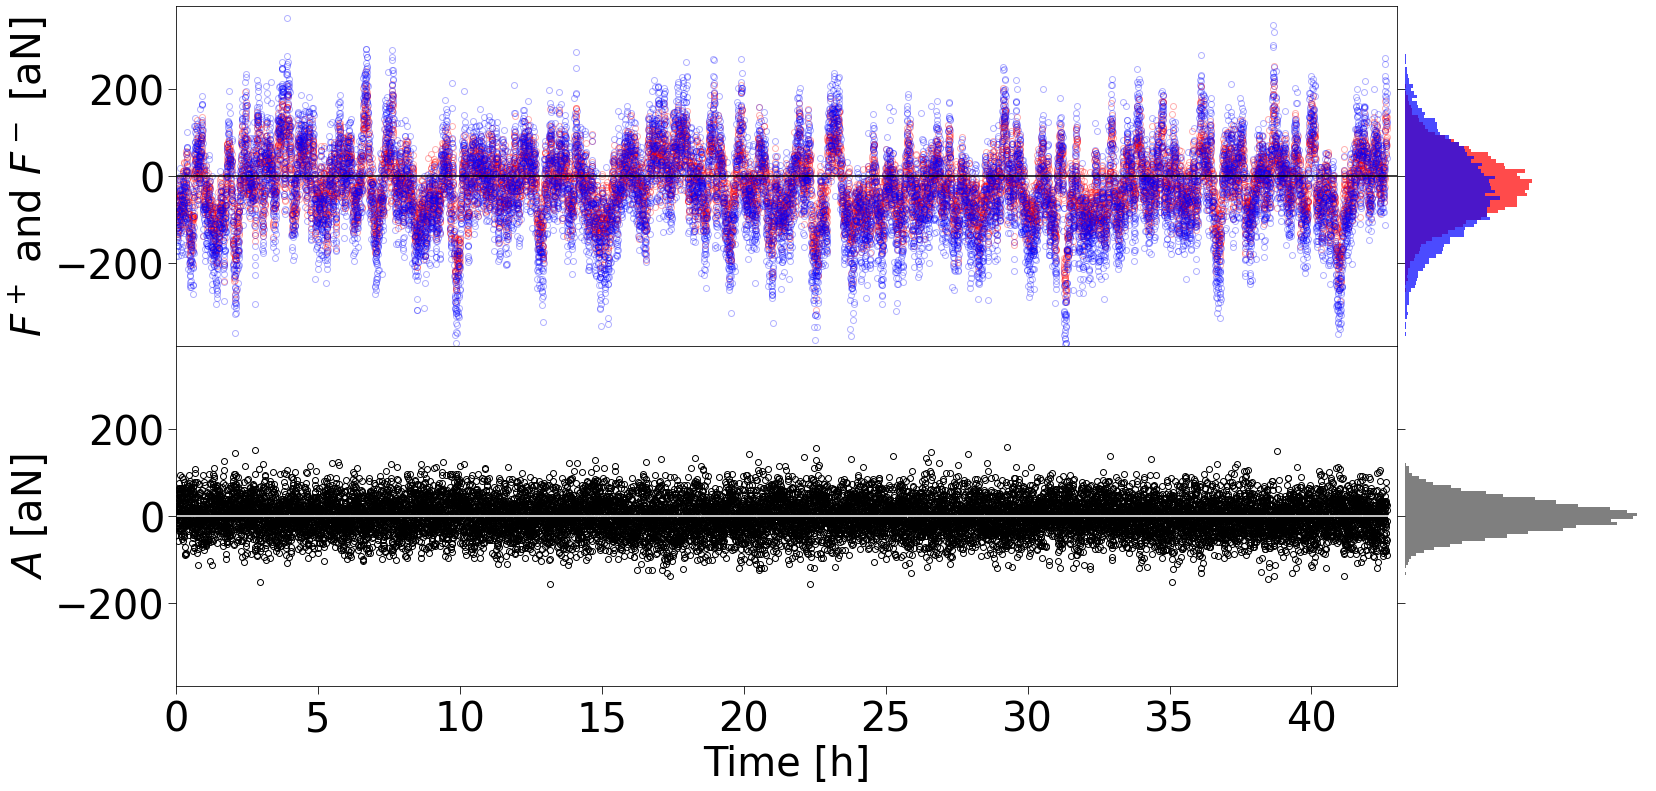

In [6]:
fig, axs = plt.subplots(2, 2, sharex="col",figsize=(24,12),gridspec_kw={'width_ratios': [5, 1]})

lowylim = -3.9*100
highylim = 3.9*100

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0,wspace=0,)
# Plot each graph, and manually set the y tick values
axs[0,0].plot(y, p/1e-18,alpha=0.3,marker="o",ls="",c="red",markerfacecolor="None")
axs[0,0].plot(y, n/1e-18,alpha=0.3,marker="o",ls="",c="blue",markerfacecolor="None")
#axs[0].set_yticks([-4,0,4])
axs[0,0].set_ylim(lowylim,highylim)
axs[0,0].axhline(0,color='black')
axs[0,0].tick_params(direction="out",length=8,labelbottom=False, labeltop=False, labelleft=True, labelright=False,
                     bottom=False, top=False, left=True, right=True,color="black")
axs[0,0].set_ylabel("$F^+$ and $F^-$ [aN]",fontsize=40)

axs[0,1].hist(p/1e-18,orientation="horizontal",color="red",bins=100,range=(lowylim,highylim),alpha=0.7)
axs[0,1].hist(n/1e-18,orientation="horizontal",color="blue",bins=100,range=(lowylim,highylim),alpha=0.7)
#axs[0,1].axhline(0,color='black')
axs[0,1].set_ylim(lowylim,highylim)
axs[0,1].axis("off")
axs[0,1].set_xlabel("")
axs[0,1].set_xticks([])

axs[0,1].set_ylabel("")
axs[0,1].set_yticks([])

#axs[1].set_yticks([-4,0,4])

axs[1,0].plot(y, -A/1e-18,marker="o",ls="",c="black",markerfacecolor="None")

axs[1,0].axhline(0,color='white')
axs[1,0].set_ylim(lowylim,highylim)
axs[1,0].set_xlim(0,43)
axs[1,0].set_ylabel("$A$ [aN]",fontsize=40)
axs[1,0].set_xlabel("Time [h]",fontsize=40)
axs[1,0].tick_params(direction="out",length=8,
                     labelbottom=True, labeltop=False, labelleft=True, 
                     labelright=False,
                     bottom=True, top=False, left=True, right=True,color="black")

axs[1,1].hist(A/1e-18,orientation="horizontal",color="black",bins=100,range=(lowylim,highylim),alpha=0.5)
#axs[1,1].axhline(0,color='white')
axs[1,1].axis("off")
axs[1,1].set_xlabel("")
axs[1,1].set_xticks([])

axs[1,1].set_ylabel("")
axs[1,1].set_yticks([])

plt.tight_layout(w_pad=0,h_pad=0)
plt.savefig("Results/fig1_response_v4.pdf",dpi=300)
plt.savefig("Results/fig1_response_v4.png")
plt.show()

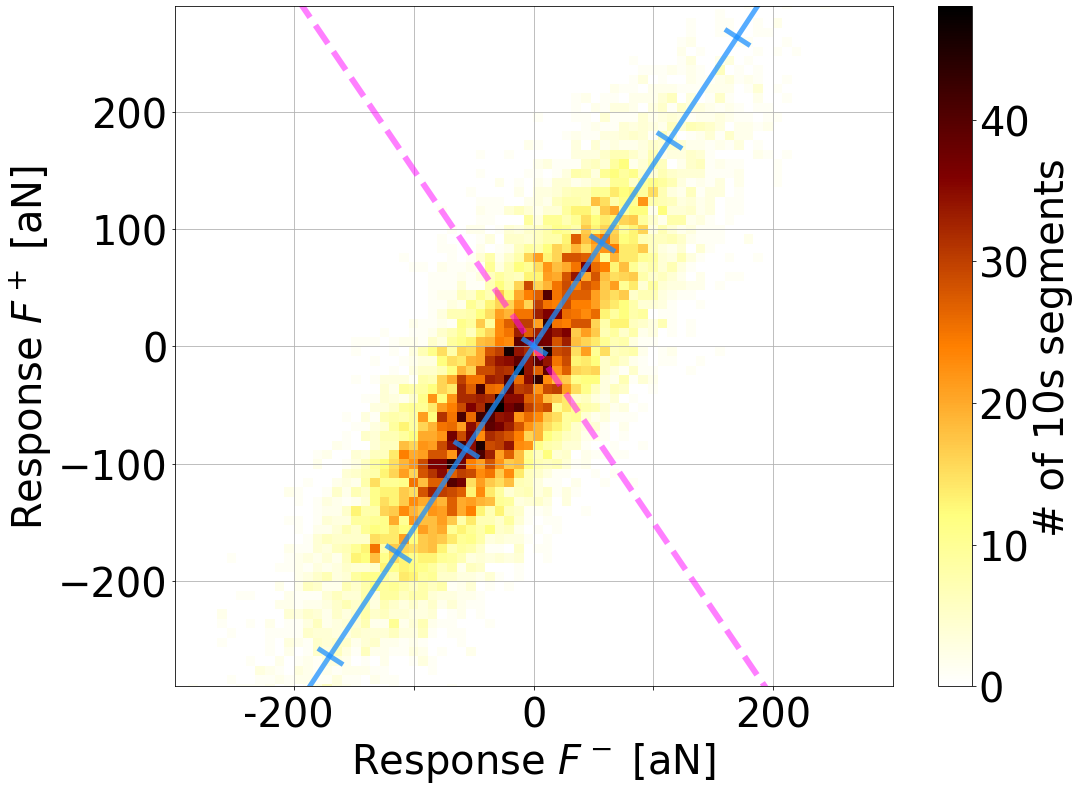

In [7]:
eDMtoForce=1/(1.1e5*200)/1.6e-19*1e6
force1ToEDM = 1/eDMtoForce
force2ToEDM=0.645*force1ToEDM

#yticks = np.arange(-5,5,force1ToEDM/1e-16)
yticks = np.arange(-250*0.0352,250*0.0352,0.0352)
xticks=0.645*yticks
#xticks = np.arange(-5,5,force2ToEDM/1e-16)

x=np.arange(-40e2,40e2,0.1)
y=-x/0.666
z=x/0.645
plt.hist2d(p/1e-18,n/1e-18,bins=(100,100),range=[(-400,400),(-400,400)],cmap=plt.cm.afmhot.reversed())
plt.plot(x,y,ls="dashed",color="magenta",lw=6,alpha=0.5)
#plt.scatter(xticks[::25],yticks[::25],marker=(2,0,0),s=500,lw=100,alpha=0.5,color="green")
plt.plot(xticks[::25]*1e2,yticks[::25]*1e2,marker=(2,0,90-np.rad2deg(np.arctan(0.645)))
         ,markersize=30,mew=5,lw=5,ls="solid",c="dodgerblue",alpha=0.75)
#plt.plot(x,z,ls="solid",color="green",lw=6,alpha=0.5)
#plt.text(-2.1,-2.6,"-75",c="dodgerblue",rotation=-np.rad2deg(np.arctan(0.645)),fontsize=22)
#plt.text(1.35,2.65,"75",c="dodgerblue",rotation=-np.rad2deg(np.arctan(0.645)),fontsize=22)
plt.xticks(ticks=[-200,-100,0,100,200], labels=['-200 ','','0','','200'])
plt.grid()

plt.colorbar(label="# of 10s segments")
plt.xlim(-300,300)
plt.ylim(-2.9e2,2.9e2)

plt.ylabel("Response $F^+$ [aN]")
plt.xlabel("Response $F^-$ [aN]")
plt.tight_layout()

plt.savefig("Results/fig2_scatter_v3.pdf",dpi=300)
plt.savefig("Results/fig2_scatter_v3.png")
plt.show()

In [8]:
def q_check(integrationTime=92,noiseFloorFactor=1,electricFieldFactor=50):
    qExisting = 3.9e-5 # why 9.75e-5?
    qCorner = qExisting*np.sqrt(92/integrationTime)/noiseFloorFactor/(electricFieldFactor/(200/4e-3/1000))
    return qCorner#chargeSens,numberSens

def retrieveSF(qExisting=3.9e-5,qIn=1):
    SF=qExisting/qIn*50
    return SF


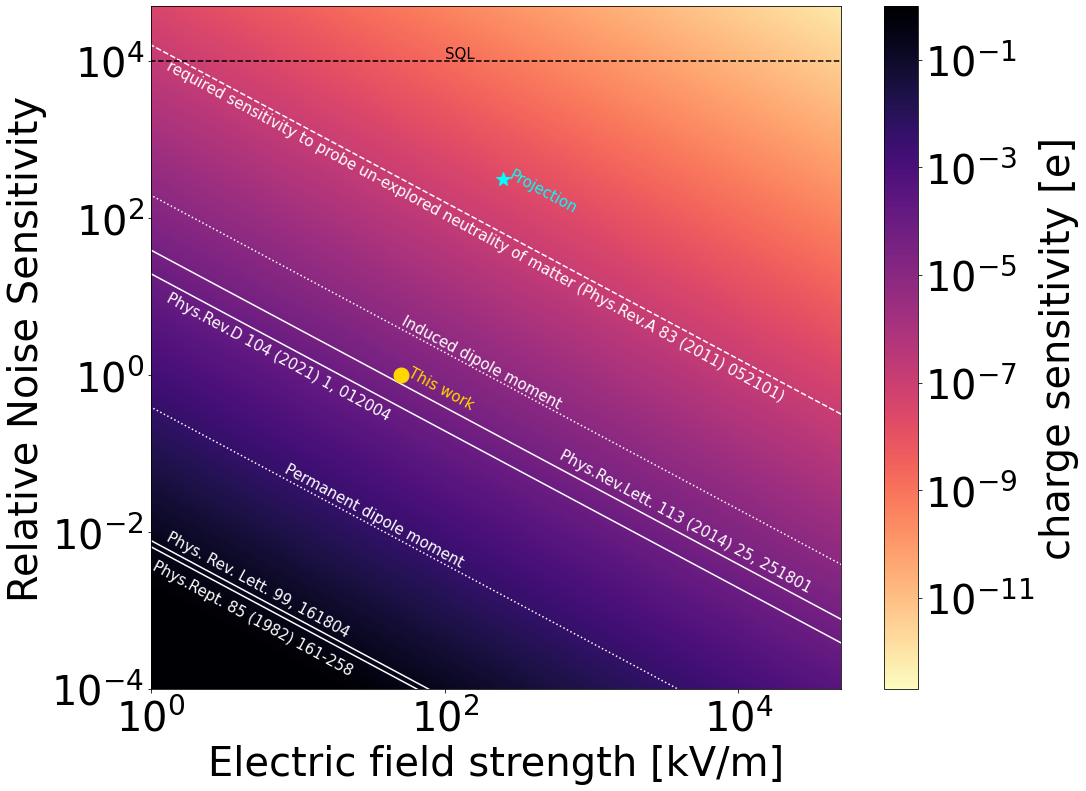

In [9]:
noise=np.logspace(-4,5,500)
eField = np.logspace(-4,5,500)

rotangle=-28.4
annofs=15
markersz=15

x1= np.logspace(-4,5,10)

# magnetic levitation, charge sensitivity = 0.25 , Phys.Rept. 85 (1982) 161-258
mmag=retrieveSF(qIn=0.3) # 
plt.plot(x1,mmag/x1,c="w")
plt.annotate("Phys.Rept. 85 (1982) 161-258", xy=(1,3.5e-3),fontsize=annofs,rotation=rotangle,rotation_mode ="anchor", c="white")

# oil drop: 0.25e from Phys. Rev. Lett. 99, 161804 – Published 19 October 2007
moil= retrieveSF(qIn=0.25)
plt.plot(x1,(moil)/x1,c="w") 
plt.annotate("Phys. Rev. Lett. 99, 161804", xy=(1.25,8e-3),fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")
# plt.text(0.65e-1,0.075,"Oil",fontsize=15,rotation=rotangle,c="w")

# permanent dipole moment using our gradients and no spinning: 5e-3
mpermdipole = retrieveSF(qIn=5e-3)
plt.plot(x1,mpermdipole/x1,c="w",ls="dotted")
plt.annotate("Permanent dipole moment", xy=(8,6e-2),fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")
# plt.text(0.25,0.15,"permanent dipole moment?",fontsize=15,rotation=rotangle,c="w")

# Gadi 2020: 1e-4 Phys.Rev.D 104 (2021) 1, 012004
moo=retrieveSF(qIn=1e-4)
plt.plot(x1,moo/x1,c="w")
plt.annotate("Phys.Rev.D 104 (2021) 1, 012004", xy=(1.25,9),fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")

# Dave 2014: 5e-5
moo2=retrieveSF(qIn=5e-5)
plt.plot(x1,moo2/x1,c="w")
plt.annotate("Phys.Rev.Lett. 113 (2014) 25, 251801", xy=(6e2,0.9e-1),fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")

#plt.annotate("Opt. Lev.", xy=(38,5.7e-1),fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")


xus=50 #inKV/m
yus=1 # in NoiseSensitivitiy
plt.plot(xus,yus,c="gold",marker="o",markersize=markersz,alpha=1)
plt.annotate("This work",xy=(xus+5,yus),color="gold",fontsize=annofs,rotation_mode ="anchor",rotation=rotangle)
#plt.text(4.5e0,7e-1,"Us",fontsize=15,rotation=-40,c="b")

# Induced dipole moment using our gradients and a suppresion factor into 1f of 10e-3/200
minddipo=retrieveSF(qIn=1e-5)
plt.plot(x1,minddipo/x1,c="white",ls="dotted")
plt.annotate("Induced dipole moment", xy=(50,4.5),fontsize=annofs,rotation_mode ="anchor",rotation=rotangle,c="white")

# plt.text(3.65,0.45,"induced dipole",fontsize=15,rotation=rotangle,c="w")

#q_check_future=q_check(integrationTime=90,noiseFloorFactor=30,electricFieldFactor=250)
xfut=250
yfut=100*np.sqrt(10)
# #plt.plot(x1,150/x1,c="w",ls="dashed")
plt.plot(xfut,yfut,c="cyan",marker="*",markersize=markersz)
plt.annotate("Projection",xy=(xfut+20,yfut+10),color="cyan",rotation_mode ="anchor",rotation=rotangle,fontsize=annofs)

# plt.text(4e1,1e1,"Future Us",fontsize=15,rotation=rotangle,c="black")

mneutral = 320*50 # from Nadav analysis
plt.plot(x1,mneutral/x1,c="w",ls="dashed")
plt.annotate("required sensitivity to probe un-explored neutrality of matter (Phys.Rev.A 83 (2011) 052101)", xy=(1.25,8e3),fontsize=annofs,rotation_mode ="anchor",rotation=rotangle,c="white")

#plt.text(2,0.1e1,"Present neutrality of matter limit using m=XZY spheres",fontsize=15,rotation=rotangle,c="w")

plt.plot(x1,1e4*x1/x1,color="black",ls="dashed")
plt.text(1e2,1.1e4,"SQL",fontsize=annofs)


cmap = plt.get_cmap('magma')    # 11 discrete colors
X,Y = np.meshgrid(noise, eField) # grid of point
Z = q_check(noiseFloorFactor=X,integrationTime=90,electricFieldFactor=Y) # evaluation of the function on the grid

plt.scatter(X,Y,c=Z,norm=matplotlib.colors.LogNorm(vmax=1),cmap=cmap.reversed()) # drawing the function
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Relative Noise Sensitivity")
plt.xlabel("Electric field strength [kV/m]")
plt.xlim(1,5e4)
plt.ylim(1e-4,5e4)
plt.colorbar(label="charge sensitivity [e]")
plt.tight_layout()
plt.savefig("Results/fig5_v1.pdf")
plt.show()

# absolut charge measurement by calibrating charge independent


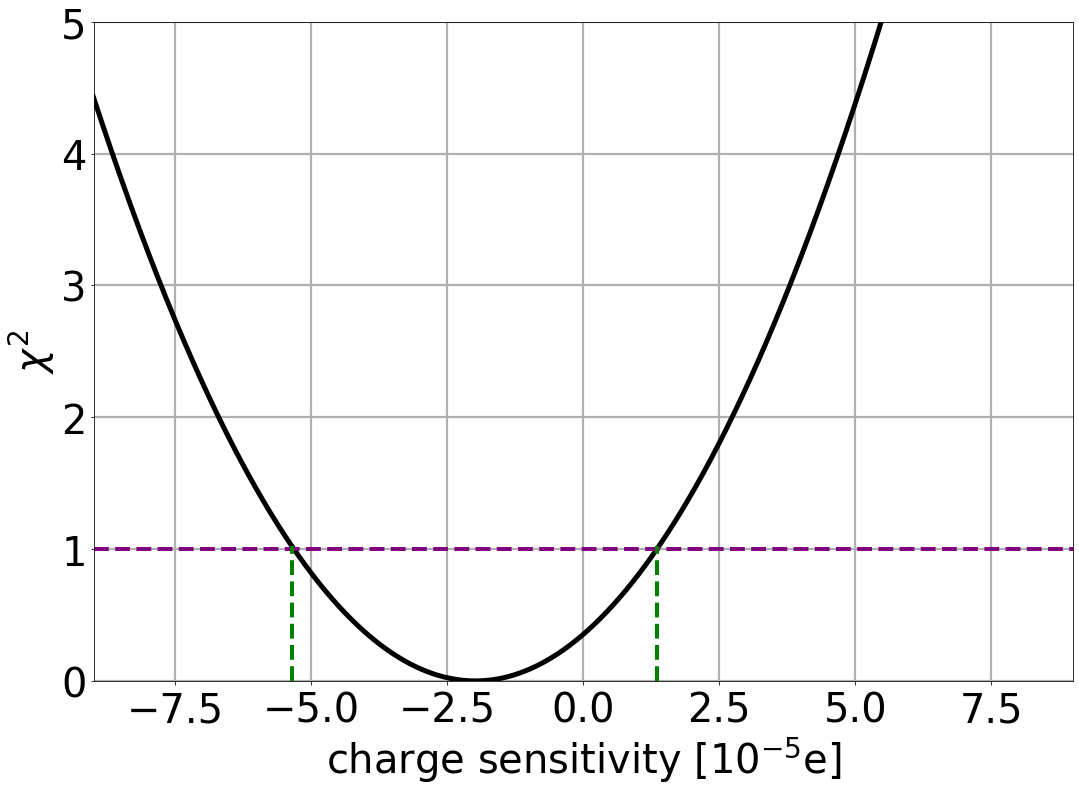

In [10]:
pL = np.load("pl_charge_20211012.npy")
plt.plot(pL[0]/1e-5,pL[1],lw=5,color="black")
#plt.plot(pL[0]/1e-5,pL[1]*8*25*100)
plt.ylim(0,5)
plt.xlim(-9,9)
#plt.axhline(1)
plt.xscale("linear")
plt.xlabel("charge sensitivity [$10^{-5}$e]")
plt.ylabel(r'$\chi^2$')
plt.axhline(1,ls="dashed",color="purple",lw=4)
plt.axvline(1.35,ymax=0.205,ls="dashed",color="green",lw=4)
plt.axvline(1.35-3.35*2,ymax=0.205,ls="dashed",color="green",lw=4)
plt.grid(linewidth=2.2)
plt.tight_layout()
plt.savefig("Results/fig_sm1_chi2.pdf",dpi=300)
plt.show()

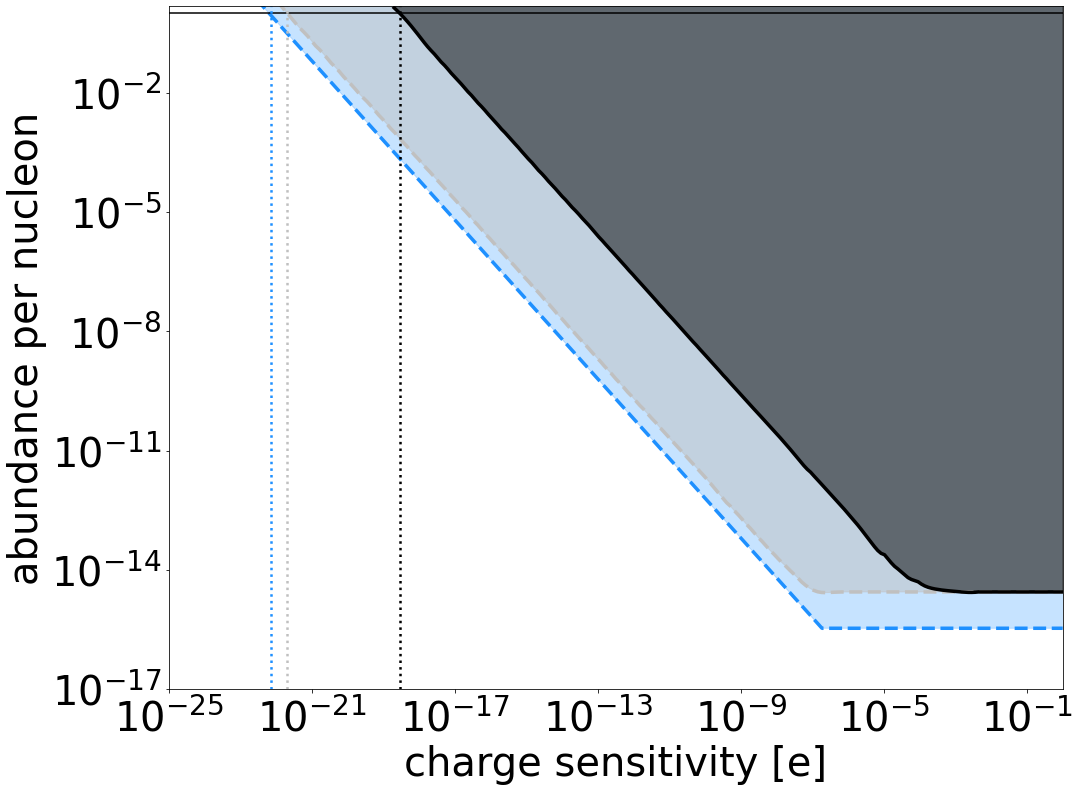

In [11]:
def sensitivity_check(integrationTime=1,noSpheres=1,noiseFloorFactor=1,electricFieldFactor=1,massFactor=1):
    highChargeLimit = 3*2.726e-15 # our measured sensitivity
    qCorner = 9.75e-5 # our corner sensitivity
    highLimit= highChargeLimit/noSpheres/massFactor
    qCorner = 9.75e-5*np.sqrt(90/integrationTime)/noiseFloorFactor/electricFieldFactor
    #print(q_corner)
    sensitivity = []
    chargeSens = np.logspace(-25,5,num=7500)
    for eps_ in chargeSens:
        if eps_>qCorner:
            sensitivity.append(highLimit)
        else:
            sensitivity.append(qCorner/eps_*highLimit)
    from scipy.signal import savgol_filter
    numberSens = savgol_filter(sensitivity, 21, 3) # window size 51, polynomial order 3    
        
    return chargeSens,numberSens

ourLimitExt = np.load("our_limit_extended.npy") 
ourProjectionExt = np.load("our_projection_extended.npy") 
ourProjectionHM = np.load("our_projection_extended_high_mass.npy")

ourcolor3="dodgerblue"
chargeSensLong, numberSensLong=sensitivity_check(100,3,100,5,8)
plt.fill_between(chargeSensLong,numberSensLong,1e20,alpha=0.25, color=ourcolor3) #hatch=" \ "
plt.plot(chargeSensLong,numberSensLong,linewidth=3.5,linestyle="dashed",color=ourcolor3,zorder=1)

ourcolor2="silver"
plt.fill_between(ourProjectionExt[0],ourProjectionExt[1],1e20,alpha=0.5, color=ourcolor2) #hatch=" \ "
plt.plot(ourProjectionExt[0],ourProjectionExt[1],linestyle="dashed",linewidth=3.5,color=ourcolor2)


ourcolor = "black"
plt.fill_between(ourLimitExt[0],ourLimitExt[1],1e20,alpha=0.5, color=ourcolor) #hatch=" \ "
plt.plot(ourLimitExt[0],ourLimitExt[1],linewidth=3.5,color=ourcolor)

plt.yscale("log")
plt.xscale("log")

plt.ylim(1e-17,1.5)
plt.xlim(1e-25,1)
plt.axvline(3e-19, color=ourcolor,linewidth=2.5,ls="dotted")
plt.axhline(1,color="black")
plt.axvline(7e-23,color=ourcolor3,linewidth=2.5,ls="dotted")
plt.axvline(2e-22,color=ourcolor2,linewidth=2.5,ls="dotted")
plt.xlabel("charge sensitivity [e]")
plt.ylabel("abundance per nucleon")
plt.tight_layout()
plt.savefig("Results/fig2_sm_mcplimit_v2.pdf",dpi=300)
#plt.axhline(1e-14)
plt.show()

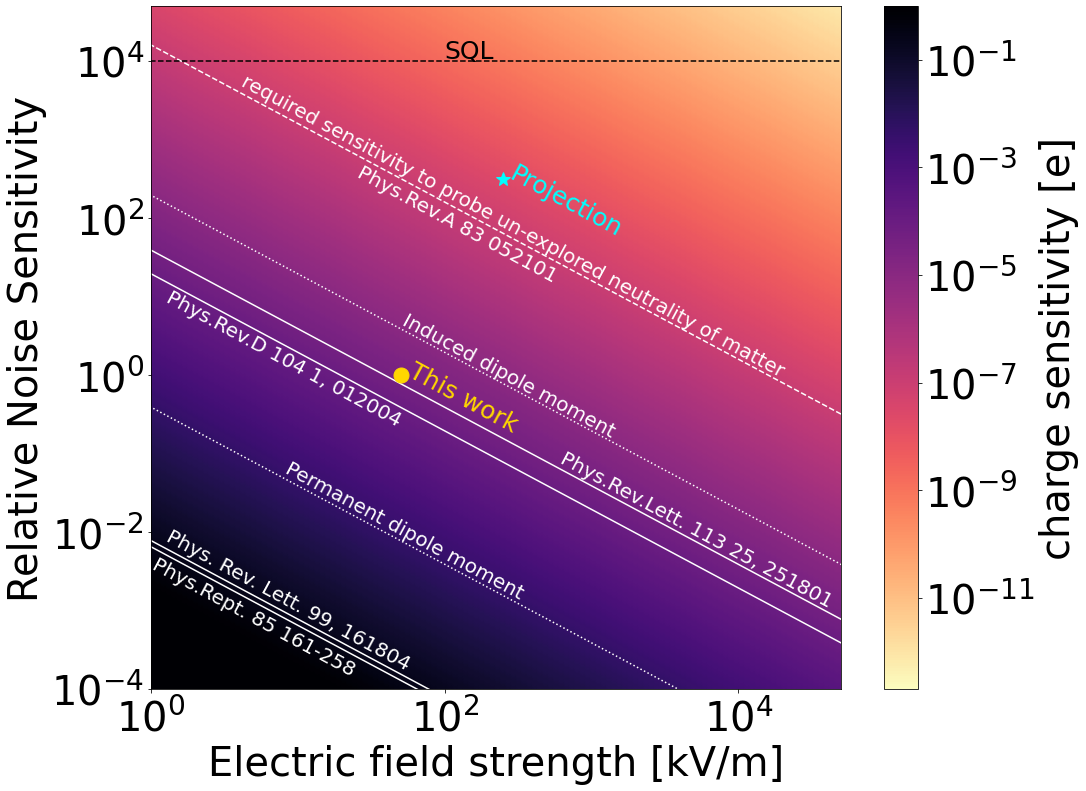

In [12]:
noise=np.logspace(-4,5,250)
eField = np.logspace(-4,5,250)

rotangle=-28.4
annofs=20
markersz=15

x1= np.logspace(-4,5,10)


# magnetic levitation, charge sensitivity = 0.25 , Phys.Rept. 85 (1982) 161-258
mmag=retrieveSF(qIn=0.3) # 
plt.plot(x1,mmag/x1,c="w")
plt.text(1,3.5e-3,"Phys.Rept. 85 161-258",fontsize=annofs,rotation=rotangle,rotation_mode ="anchor", c="white")

# oil drop: 0.25e from Phys. Rev. Lett. 99, 161804 – Published 19 October 2007
moil= retrieveSF(qIn=0.25)
plt.plot(x1,(moil)/x1,c="w") 
plt.text(1.25,8e-3,"Phys. Rev. Lett. 99, 161804",fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")

# permanent dipole moment using our gradients and no spinning: 5e-3
mpermdipole = retrieveSF(qIn=5e-3)
plt.plot(x1,mpermdipole/x1,c="w",ls="dotted")
plt.text(8,6e-2,"Permanent dipole moment",fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")

# Gadi 2020: 1e-4 Phys.Rev.D 104 (2021) 1, 012004
moo=retrieveSF(qIn=1e-4)
plt.plot(x1,moo/x1,c="w")
plt.text(1.25,9,"Phys.Rev.D 104 1, 012004",fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")

# Dave 2014: 5e-5
moo2=retrieveSF(qIn=5e-5)
plt.plot(x1,moo2/x1,c="w")
plt.text(6e2,0.80e-1,"Phys.Rev.Lett. 113 25, 251801",fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")

xus=50 #inKV/m
yus=1 # in NoiseSensitivitiy
plt.plot(xus,yus,c="gold",marker="o",markersize=markersz,alpha=1)
plt.text(xus+5,yus,"This work",color="gold",fontsize=annofs+5,rotation_mode ="anchor",rotation=rotangle)

# Induced dipole moment using our gradients and a suppresion factor into 1f of 10e-3/200
minddipo=retrieveSF(qIn=1e-5)
plt.plot(x1,minddipo/x1,c="white",ls="dotted")
plt.text(50,4.5,"Induced dipole moment", fontsize=annofs,rotation_mode ="anchor",rotation=rotangle,c="white")

# plt.text(3.65,0.45,"induced dipole",fontsize=15,rotation=rotangle,c="w")

#q_check_future=q_check(integrationTime=90,noiseFloorFactor=30,electricFieldFactor=250)
xfut=250
yfut=100*np.sqrt(10)
# #plt.plot(x1,150/x1,c="w",ls="dashed")
plt.plot(xfut,yfut,c="cyan",marker="*",markersize=markersz)
plt.text(xfut+20,yfut+10,"Projection",color="cyan",rotation_mode ="anchor",rotation=rotangle,fontsize=annofs+5)

# plt.text(4e1,1e1,"Future Us",fontsize=15,rotation=rotangle,c="black")

mneutral = 320*50 # from Nadav analysis
plt.plot(x1,mneutral/x1,c="w",ls="dashed")
plt.text(4,5e3,"required sensitivity to probe un-explored neutrality of matter",fontsize=annofs,rotation_mode ="anchor",rotation=rotangle,c="white")
plt.text(25,3.5e2,"Phys.Rev.A 83 052101",fontsize=annofs,rotation_mode ="anchor",rotation=rotangle,c="white")
#plt.text(2,0.1e1,"Present neutrality of matter limit using m=XZY spheres",fontsize=15,rotation=rotangle,c="w")

plt.plot(x1,1e4*x1/x1,color="black",ls="dashed")
plt.text(1e2,1.1e4,"SQL",fontsize=annofs+5)


cmap = plt.get_cmap('magma')    # 11 discrete colors
X,Y = np.meshgrid(noise, eField) # grid of point
Z = q_check(noiseFloorFactor=X,integrationTime=90,electricFieldFactor=Y) # evaluation of the function on the grid

plt.scatter(X,Y,c=Z,norm=matplotlib.colors.LogNorm(vmax=1),cmap=cmap.reversed()) # drawing the function
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Relative Noise Sensitivity")
plt.xlabel("Electric field strength [kV/m]")
plt.xlim(1,5e4)
plt.ylim(1e-4,5e4)
plt.colorbar(label="charge sensitivity [e]")
plt.tight_layout()
plt.savefig("Results/fig4_chargesens_v3.pdf",dpi=300)
plt.savefig("Results/fig4_chargesens_v3.png")
plt.show()

# absolut charge measurement by calibrating charge independent


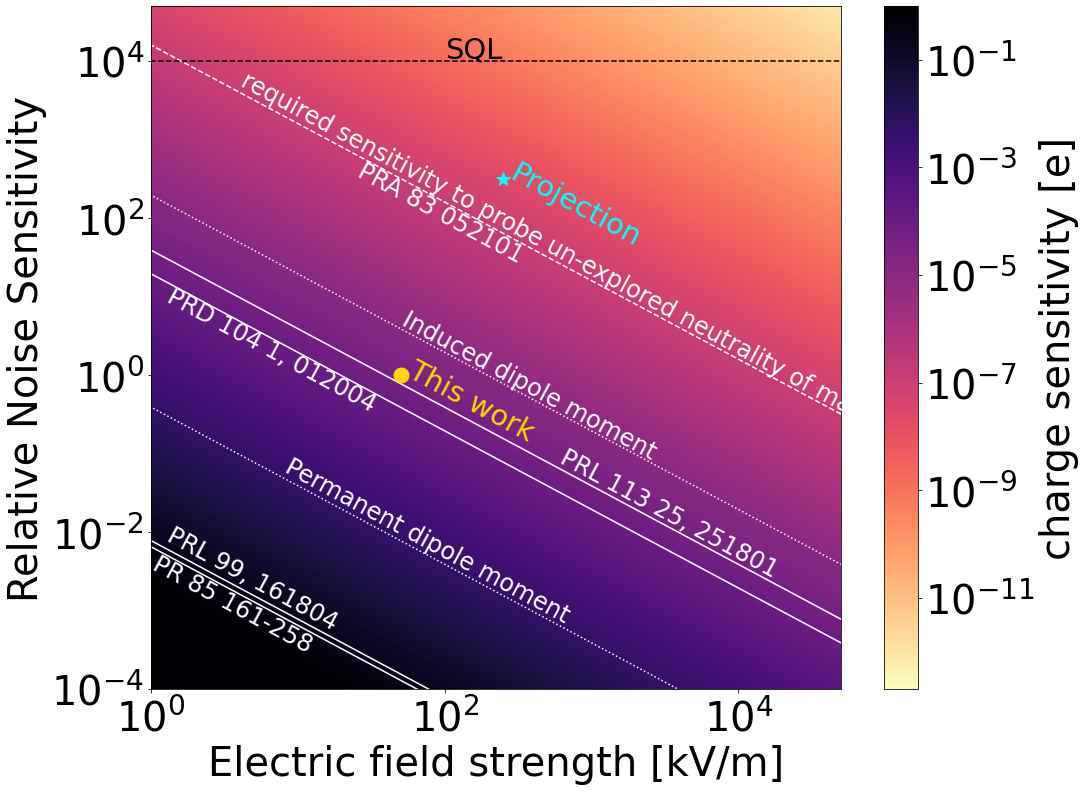

In [13]:
noise=np.logspace(-4,5,250)
eField = np.logspace(-4,5,250)

rotangle=-28.4
annofs=24
markersz=15

x1= np.logspace(-4,5,10)


# magnetic levitation, charge sensitivity = 0.25 , Phys.Rept. 85 (1982) 161-258
mmag=retrieveSF(qIn=0.3) # 
plt.plot(x1,mmag/x1,c="w")
plt.text(1,3.5e-3,"PR 85 161-258",fontsize=annofs,rotation=rotangle,rotation_mode ="anchor", c="white")

# oil drop: 0.25e from Phys. Rev. Lett. 99, 161804 – Published 19 October 2007
moil= retrieveSF(qIn=0.25)
plt.plot(x1,(moil)/x1,c="w") 
plt.text(1.25,8e-3,"PRL 99, 161804",fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")

# permanent dipole moment using our gradients and no spinning: 5e-3
mpermdipole = retrieveSF(qIn=5e-3)
plt.plot(x1,mpermdipole/x1,c="w",ls="dotted")
plt.text(8,6e-2,"Permanent dipole moment",fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")

# Gadi 2020: 1e-4 Phys.Rev.D 104 (2021) 1, 012004
moo=retrieveSF(qIn=1e-4)
plt.plot(x1,moo/x1,c="w")
plt.text(1.25,9,"PRD 104 1, 012004",fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")

# Dave 2014: 5e-5
moo2=retrieveSF(qIn=5e-5)
plt.plot(x1,moo2/x1,c="w")
plt.text(6e2,0.80e-1,"PRL 113 25, 251801",fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")

xus=50 #inKV/m
yus=1 # in NoiseSensitivitiy
plt.plot(xus,yus,c="gold",marker="o",markersize=markersz,alpha=1)
plt.text(xus+5,yus,"This work",color="gold",fontsize=annofs+5,rotation_mode ="anchor",rotation=rotangle)

# Induced dipole moment using our gradients and a suppresion factor into 1f of 10e-3/200
minddipo=retrieveSF(qIn=1e-5)
plt.plot(x1,minddipo/x1,c="white",ls="dotted")
plt.text(50,4.5,"Induced dipole moment", fontsize=annofs,rotation_mode ="anchor",rotation=rotangle,c="white")

# plt.text(3.65,0.45,"induced dipole",fontsize=15,rotation=rotangle,c="w")

#q_check_future=q_check(integrationTime=90,noiseFloorFactor=30,electricFieldFactor=250)
xfut=250
yfut=100*np.sqrt(10)
# #plt.plot(x1,150/x1,c="w",ls="dashed")
plt.plot(xfut,yfut,c="cyan",marker="*",markersize=markersz)
plt.text(xfut+20,yfut+10,"Projection",color="cyan",rotation_mode ="anchor",rotation=rotangle,fontsize=annofs+5)

# plt.text(4e1,1e1,"Future Us",fontsize=15,rotation=rotangle,c="black")

mneutral = 320*50 # from Nadav analysis
plt.plot(x1,mneutral/x1,c="w",ls="dashed")
plt.text(4,5e3,"required sensitivity to probe un-explored neutrality of matter",fontsize=annofs,rotation_mode ="anchor",rotation=rotangle,c="white")
plt.text(25,3.5e2,"PRA 83 052101",fontsize=annofs,rotation_mode ="anchor",rotation=rotangle,c="white")
#plt.text(2,0.1e1,"Present neutrality of matter limit using m=XZY spheres",fontsize=15,rotation=rotangle,c="w")

plt.plot(x1,1e4*x1/x1,color="black",ls="dashed")
plt.text(1e2,1.1e4,"SQL",fontsize=annofs+5)


cmap = plt.get_cmap('magma')    # 11 discrete colors
X,Y = np.meshgrid(noise, eField) # grid of point
Z = q_check(noiseFloorFactor=X,integrationTime=90,electricFieldFactor=Y) # evaluation of the function on the grid

plt.scatter(X,Y,c=Z,norm=matplotlib.colors.LogNorm(vmax=1),cmap=cmap.reversed()) # drawing the function
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Relative Noise Sensitivity")
plt.xlabel("Electric field strength [kV/m]")
plt.xlim(1,5e4)
plt.ylim(1e-4,5e4)
plt.colorbar(label="charge sensitivity [e]")
plt.tight_layout()
plt.savefig("Results/fig4_chargesens_v4.pdf",dpi=300)
plt.savefig("Results/fig4_chargesens_v4.png")
plt.show()

# absolut charge measurement by calibrating charge independent


### Plots generated after Alex became a father
(generated by Nadav)

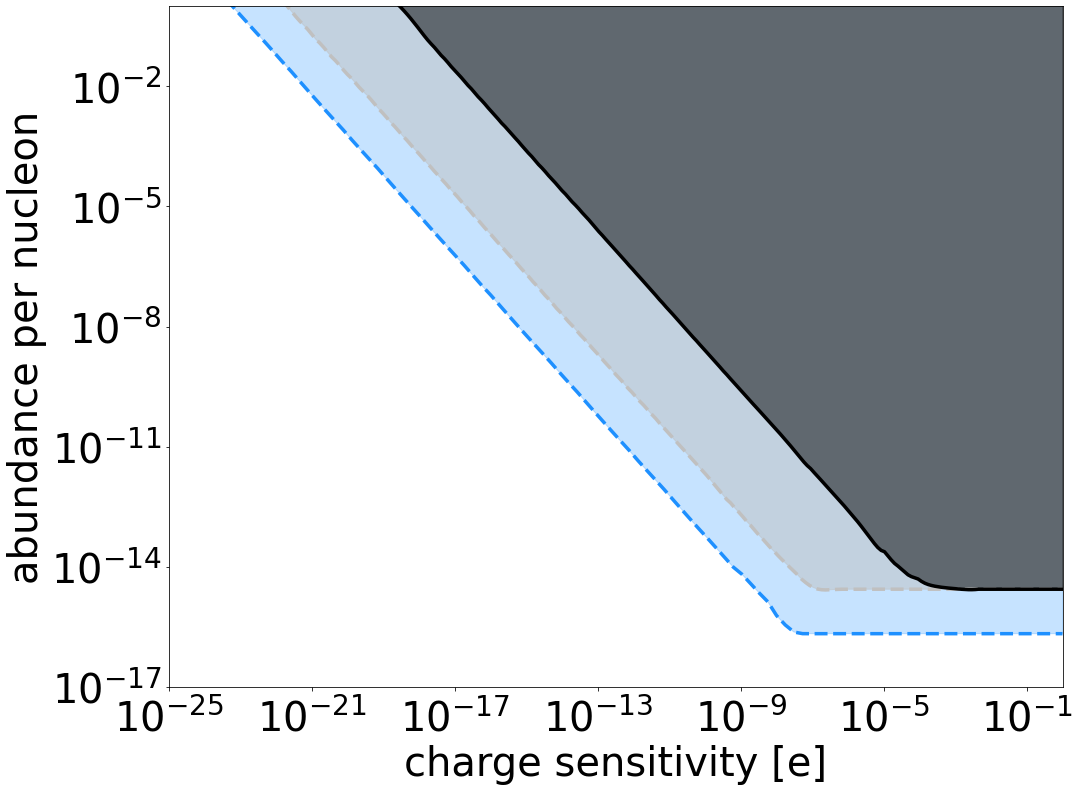

In [23]:
ourLimitExt = np.load("our_limit_extended.npy") 
ourProjectionExt = np.load("our_projection_extended.npy") 
ourProjectionHM = np.load("our_projection_extended_high_mass.npy")

ourcolor3="dodgerblue"
chargeSensLong, numberSensLong=sensitivity_check(100,3,100,5,8)
plt.fill_between(ourProjectionHM[0],ourProjectionHM[1],1e20,alpha=0.25, color=ourcolor3) #hatch=" \ "
plt.plot(ourProjectionHM[0],ourProjectionHM[1],linewidth=3.5,linestyle="dashed",color=ourcolor3,zorder=1)

ourcolor2="silver"
plt.fill_between(ourProjectionExt[0],ourProjectionExt[1],1e20,alpha=0.5, color=ourcolor2) #hatch=" \ "
plt.plot(ourProjectionExt[0],ourProjectionExt[1],linestyle="dashed",linewidth=3.5,color=ourcolor2)


ourcolor = "black"
plt.fill_between(ourLimitExt[0],ourLimitExt[1],1e20,alpha=0.5, color=ourcolor) #hatch=" \ "
plt.plot(ourLimitExt[0],ourLimitExt[1],linewidth=3.5,color=ourcolor)

plt.yscale("log")
plt.xscale("log")

plt.ylim(1e-17,1)
plt.xlim(1e-25,1)
# plt.axvline(3e-19, color=ourcolor,linewidth=2.5,ls="dotted")
# plt.axhline(1,color="black")
# plt.axvline(7e-23,color=ourcolor3,linewidth=2.5,ls="dotted")
# plt.axvline(2e-22,color=ourcolor2,linewidth=2.5,ls="dotted")
plt.xlabel("charge sensitivity [e]")
plt.ylabel("abundance per nucleon")
plt.tight_layout()
plt.savefig("Results/fig2_sm_mcplimit_v4.pdf",dpi=300)
#plt.axhline(1e-14)
plt.show()

In [18]:
stanford2014 = np.load("dave_data.npy")
yale2020 = np.load("gadi_data.npy")
gallinaro1977 = [np.logspace(-25,-1), 8.33e-21*0.2/np.logspace(-25,-1)]

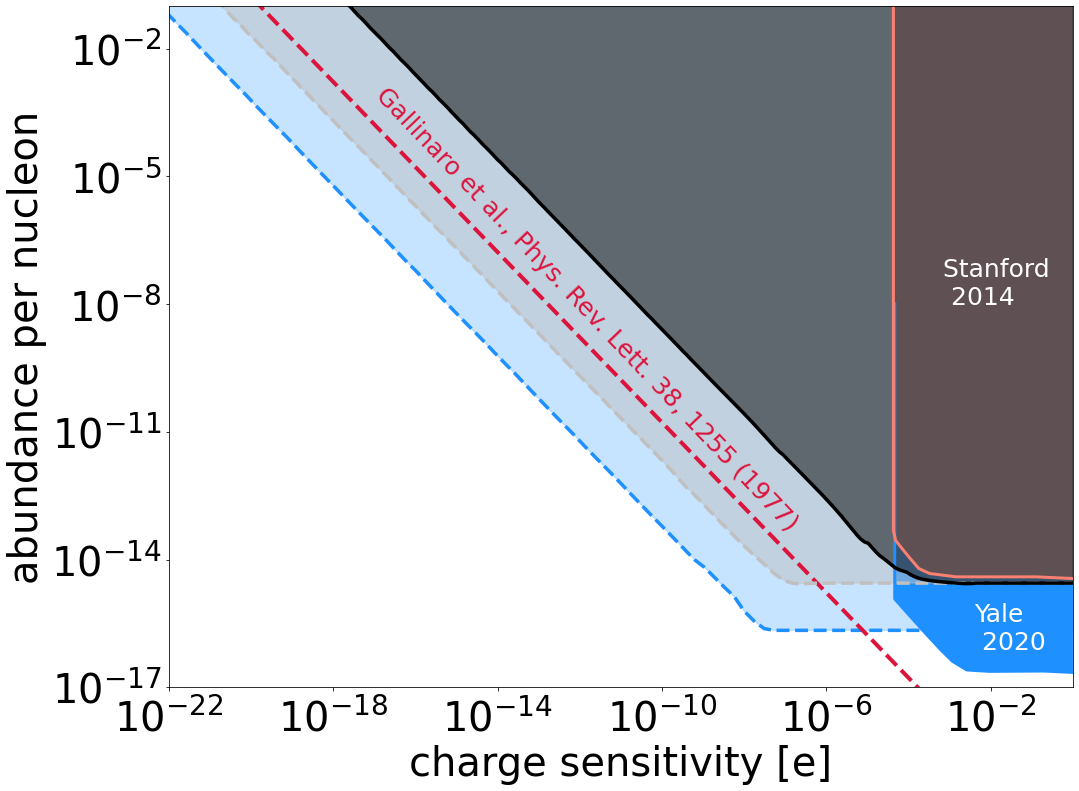

In [24]:
yale2020Color = "dodgerblue"
plt.fill_between(yale2020[::2],yale2020[1::2],1e20,alpha=1,color=yale2020Color) #hatch=" \ "
plt.plot(yale2020[::2],yale2020[1::2],linewidth=3,color="dodgerblue")#yale2020Color)
plt.text(4e-3,8e-17,"Yale \n 2020", color='white', fontsize=25)

stanford2014Color = "salmon"
plt.fill_between(stanford2014[::2],stanford2014[1::2],1e20,alpha=1, color=stanford2014Color) #hatch=" \ "
plt.plot(stanford2014[::2],stanford2014[1::2],linewidth=3, color="salmon")#stanford2014Color)
plt.text(7e-4,1e-8,"Stanford \n 2014", color='white', fontsize=25)

rotangle=-46.5
plt.text(1e-17,8e-4,"Gallinaro et al., Phys. Rev. Lett. 38, 1255 (1977)",fontsize=25,rotation_mode ="anchor",rotation=rotangle,c="crimson")
plt.plot(gallinaro1977[0], gallinaro1977[1],linestyle="dashed", linewidth=4, color="crimson")

ourcolor3="dodgerblue"
chargeSensLong, numberSensLong=sensitivity_check(100,3,100,5,8)
plt.fill_between(ourProjectionHM[0],ourProjectionHM[1],1e20,alpha=0.25, color=ourcolor3) #hatch=" \ "
plt.plot(ourProjectionHM[0],ourProjectionHM[1],linewidth=3.5,linestyle="dashed",color=ourcolor3,zorder=1)

ourcolor2="silver"
plt.fill_between(ourProjectionExt[0],ourProjectionExt[1],1e20,alpha=0.5, color=ourcolor2) #hatch=" \ "
plt.plot(ourProjectionExt[0],ourProjectionExt[1],linestyle="dashed",linewidth=3.5,color=ourcolor2)


ourcolor = "black"
plt.fill_between(ourLimitExt[0],ourLimitExt[1],1e20,alpha=0.5, color=ourcolor) #hatch=" \ "
plt.plot(ourLimitExt[0],ourLimitExt[1],linewidth=3.5,color=ourcolor)

plt.yscale("log")
plt.xscale("log")

plt.ylim(1e-17,0.1)
plt.xlim(1e-22,1)
# plt.axvline(3e-19, color=ourcolor,linewidth=2.5,ls="dotted")
# plt.axhline(1,color="black")
# plt.axvline(7e-23,color=ourcolor3,linewidth=2.5,ls="dotted")
# plt.axvline(2e-22,color=ourcolor2,linewidth=2.5,ls="dotted")
plt.xlabel("charge sensitivity [e]")
plt.ylabel("abundance per nucleon")
plt.tight_layout()
plt.savefig("Results/fig2_sm_mcplimit_v4_presentations.pdf",dpi=300)
#plt.axhline(1e-14)
plt.show()

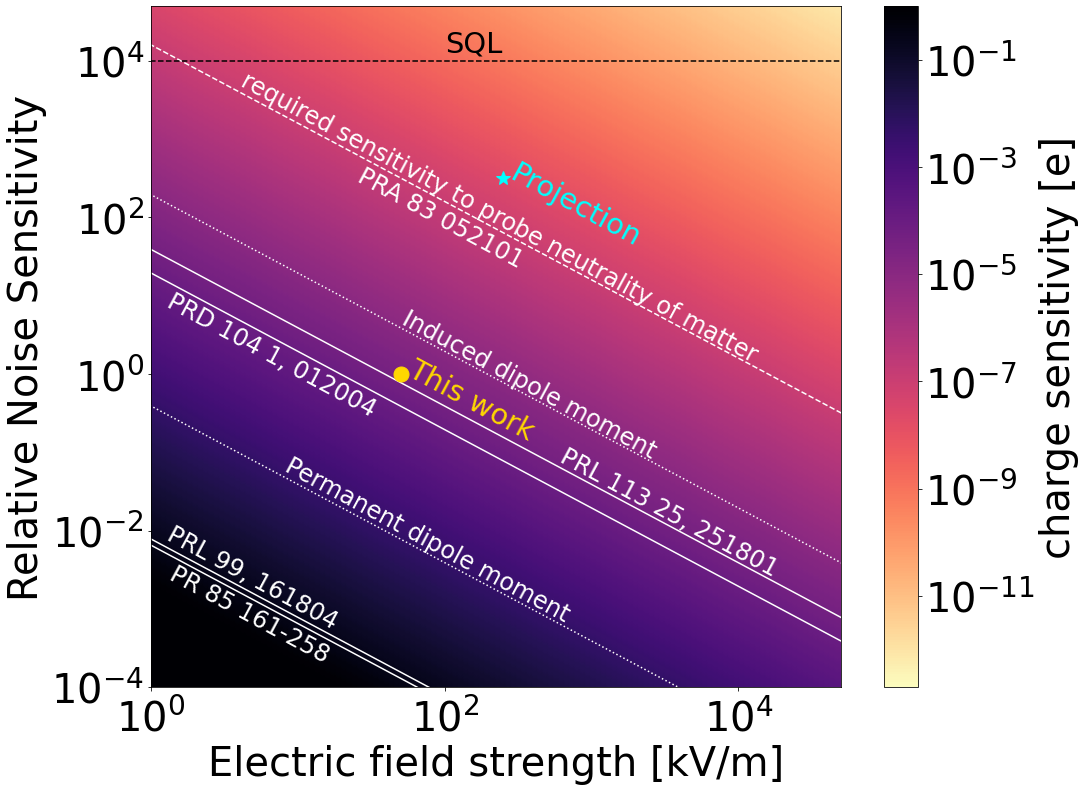

In [22]:
noise=np.logspace(-4,5,250)
eField = np.logspace(-4,5,250)

rotangle=-28.4
annofs=24
markersz=15

x1= np.logspace(-4,5,10)


# magnetic levitation, charge sensitivity = 0.25 , Phys.Rept. 85 (1982) 161-258
mmag=retrieveSF(qIn=0.3) # 
plt.plot(x1,mmag/x1,c="w")
plt.text(1.3,2.5e-3,"PR 85 161-258",fontsize=annofs,rotation=rotangle,rotation_mode ="anchor", c="white")

# oil drop: 0.25e from Phys. Rev. Lett. 99, 161804 – Published 19 October 2007
moil= retrieveSF(qIn=0.25)
plt.plot(x1,(moil)/x1,c="w") 
plt.text(1.25,8e-3,"PRL 99, 161804",fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")

# permanent dipole moment using our gradients and no spinning: 5e-3
mpermdipole = retrieveSF(qIn=5e-3)
plt.plot(x1,mpermdipole/x1,c="w",ls="dotted")
plt.text(8,6e-2,"Permanent dipole moment",fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")

# Gadi 2020: 1e-4 Phys.Rev.D 104 (2021) 1, 012004
moo=retrieveSF(qIn=1e-4)
plt.plot(x1,moo/x1,c="w")
plt.text(1.25,7.5,"PRD 104 1, 012004",fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")

# Dave 2014: 5e-5
moo2=retrieveSF(qIn=5e-5)
plt.plot(x1,moo2/x1,c="w")
plt.text(6e2,0.80e-1,"PRL 113 25, 251801",fontsize=annofs,rotation=rotangle,rotation_mode ="anchor",c="white")

xus=50 #inKV/m
yus=1 # in NoiseSensitivitiy
plt.plot(xus,yus,c="gold",marker="o",markersize=markersz,alpha=1)
plt.text(xus+5,yus,"This work",color="gold",fontsize=annofs+5,rotation_mode ="anchor",rotation=rotangle)

# Induced dipole moment using our gradients and a suppresion factor into 1f of 10e-3/200
minddipo=retrieveSF(qIn=1e-5)
plt.plot(x1,minddipo/x1,c="white",ls="dotted")
plt.text(50,4.5,"Induced dipole moment", fontsize=annofs,rotation_mode ="anchor",rotation=rotangle,c="white")

# plt.text(3.65,0.45,"induced dipole",fontsize=15,rotation=rotangle,c="w")

#q_check_future=q_check(integrationTime=90,noiseFloorFactor=30,electricFieldFactor=250)
xfut=250
yfut=100*np.sqrt(10)
# #plt.plot(x1,150/x1,c="w",ls="dashed")
plt.plot(xfut,yfut,c="cyan",marker="*",markersize=markersz)
plt.text(xfut+20,yfut+10,"Projection",color="cyan",rotation_mode ="anchor",rotation=rotangle,fontsize=annofs+5)

# plt.text(4e1,1e1,"Future Us",fontsize=15,rotation=rotangle,c="black")

mneutral = 320*50 # from Nadav analysis
plt.plot(x1,mneutral/x1,c="w",ls="dashed")
plt.text(4,5e3,"required sensitivity to probe neutrality of matter",fontsize=annofs,rotation_mode ="anchor",rotation=rotangle,c="white")
plt.text(25,3e2,"PRA 83 052101",fontsize=annofs,rotation_mode ="anchor",rotation=rotangle,c="white")
#plt.text(2,0.1e1,"Present neutrality of matter limit using m=XZY spheres",fontsize=15,rotation=rotangle,c="w")

plt.plot(x1,1e4*x1/x1,color="black",ls="dashed")
plt.text(1e2,1.3e4,"SQL",fontsize=annofs+5)


cmap = plt.get_cmap('magma')    # 11 discrete colors
X,Y = np.meshgrid(noise, eField) # grid of point
Z = q_check(noiseFloorFactor=X,integrationTime=90,electricFieldFactor=Y) # evaluation of the function on the grid

plt.scatter(X,Y,c=Z,norm=matplotlib.colors.LogNorm(vmax=1),cmap=cmap.reversed()) # drawing the function
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Relative Noise Sensitivity")
plt.xlabel("Electric field strength [kV/m]")
plt.xlim(1,5e4)
plt.ylim(1e-4,5e4)
plt.colorbar(label="charge sensitivity [e]")
plt.tight_layout()
plt.savefig("Results/fig4_chargesens_v4.pdf",dpi=300)
plt.savefig("Results/fig4_chargesens_v4.png")
plt.show()

# absolut charge measurement by calibrating charge independent
